# US Unemployment and Participation Rate - Economic Data Analysis Project 

In [2]:
pip install fredapi 

Note: you may need to restart the kernel to use updated packages.


In [127]:
# importing libs 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 

plt.style.use('fivethirtyeight') # Default plotting style for all graphs 
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
pd.set_option("display.max_columns", 500)

# 1. Creating the Fred Project 

In [30]:
from fredapi import Fred
fred_key = '' 

fred = Fred(api_key = fred_key)

# 2. Search for Economic Data

In [42]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [46]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-07-10   2024-07-10   
CSUSHPINSA          CSUSHPINSA     2024-07-10   2024-07-10   
SP500                    SP500     2024-07-10   2024-07-10   
MEHOINUSA672N    MEHOINUSA672N     2024-07-10   2024-07-10   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-07-10   2024-07-10   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-07-08  Daily, Close   
CSUSHPINSA            1987-01-01      2024-04-01       Monthly   
SP500                 2014-07-10      2024-07-09  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-07-08  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-07-09 07:32:05-05:00   
CSUSHPINSA                           NSA  2024-06-25 08:12:01-05:00   
SP500                                NSA  2024-07-09 19:11:07-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-07-09 07:32:04-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 3. Pulling RAW Data & Plot

In [69]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

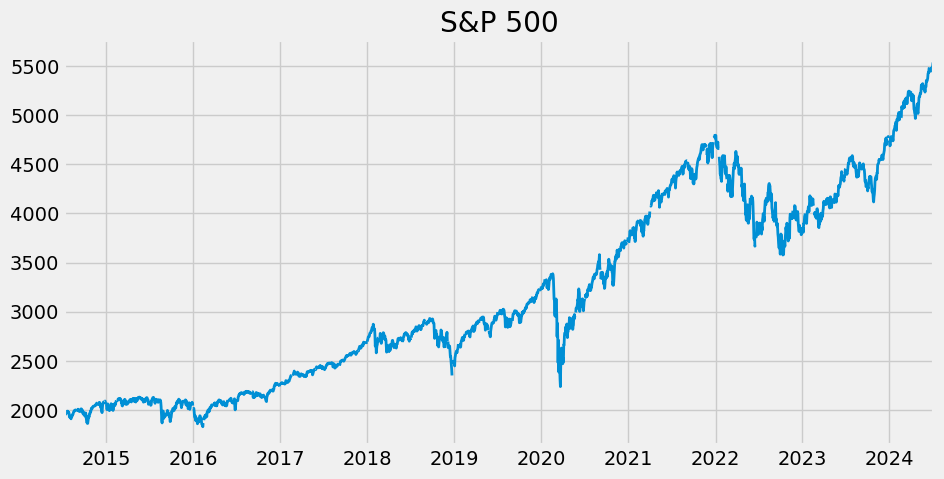

In [77]:
# Plotting graph to make sure data is as expected 
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 2)

# 4. Pulling and joining Multiple Data Series 

In [242]:
# Unemployment metadata dataframe
unemp_df = fred.search('Unemployment Rate State', filter = ('frequency', 'Monthly')) 
# Searching the fred database for results that show unemployment rate state and filtering it based on frequency and monthly
unemp_df = unemp_df.query(' seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ')
# Querying the results given to only show results that are seasonally adjusted and in percent
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in' or 'Unemployment Rate for')]
# Locating all results where the datasets contain the word Unemployment Rate

In [264]:
all_results = [] # List of all the returned results

for myid in unemp_df.index:
        results = fred.get_series(myid) # Retrieving the series data from Fred API for the given series ID
        results = results.to_frame(name = myid) # Converting the series to a DataFrame with the series ID as the column name
        all_results.append(results) # Apppending the DataFrame to the all_results list 

In [267]:
concat_df = pd.concat(all_results, axis = 1) # Combining all the individual DataFrames into a singular DataFrame

In [268]:
concat_df

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-01-01   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   3.5   4.7   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5   4.8   
2024-03-01   5.3   3.9   4.3   3.2   3.4   3.8   3.9   3.0   2.9   3.5   4.8   
2024-04-01   5.3   4.0   4.2   3.3   3.4   4.0   3.9   3.1   2.9   3.5   4.8   
2024-05-01   5.2   4.0   4.2   3.3   3.4   4.2   3.9   3.0   3.0   3.6   4.9   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-01-01   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   2.7   3.5   
2024-02-01   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   2.7   3.3   
2024-03-01   4.8   3.1   3.7   3.8   3.0   2.9   4.5   3.1   3.8   2.7   3.2   
2024-04-01   4.7   3.1   3.7   3.6   2.9   2.8   4.6   3.2   3.8   2.7   3.1   
2024-05-01   4.6   3.2   3.8   3.4   2.9   2.7   4.6   3.4   3.8   2.8   3.0   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-01-01   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-02-01   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.6   3.0   2.8   
2024-03-01   4.8   2.5   4.2   4.3   5.1   3.5   3.5   3.3   4.6   2.9   2.8   
2024-04-01   4.8   2.6   4.2   4.3   5.1   3.4   3.5   3.4   4.6   2.8   2.8   
2024-05-01   4.9   2.7   4.2   4.2   5.1   3.4   3.5   3.5   4.5   2.8   2.9   

            PRUR  INUR  LAUR  HIUR  LASMT261982000000003  NDUR  MTUR  DCUR  \
1976-01-01  19.6   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-02-01  19.5   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-03-01  19.3   6.5   6.3   9.8                   NaN   3.4   5.8   8.6   
1976-04-01  19.0   6.3   6.4   9.7                   NaN   3.5   5.8   8.5   
1976-05-01  18.9   6.0   6.5   9.4                   NaN   3.6   5.8   8.4   
...          ...   ...   ...   ...                   ...   ...   ...   ...   
2024-01-01   5.7   3.5   4.1   3.1                   3.9   1.9   3.3   5.0   
2024-02-01   5.7   3.5   4.2   3.1                   3.8   2.0   3.4   5.1   
2024-03-01   5.8   3.5   4.4   3.1                   3.8   2.0   3.3   5.2   
2024-04-01   5.8   3.6   4.3   3.1                   3.8   2.0   3.1   5.2   
2024-05-01   5.8   3.7   4.1   3.0                   3.9   2.0   3.1   5.3   

            MSUR  MEUR  NEUR  LASMT391746000000003  CTUR  IDUR  NHUR  RIUR  \
1976-01-01   6.7   8.7   3.3                   NaN   9.8   5.6   6.5   7.8   
1976-02-01   6.7   8.7   3.3        

# Cleaning the Data 

In [337]:
# Searching what LASMT261982000000003 and LASMT391746000000003 is 
Search = unemp_df.query(' id == "LASMT261982000000003" or id == "LASMT391746000000003" ')
Search

id realtime_start realtime_end  \
series id                                                                
LASMT261982000000003  LASMT261982000000003     2024-07-11   2024-07-11   
LASMT391746000000003  LASMT391746000000003     2024-07-11   2024-07-11   

                                                                  title  \
series id                                                                 
LASMT261982000000003  Unemployment Rate in Detroit-Warren-Dearborn, ...   
LASMT391746000000003    Unemployment Rate in Cleveland-Elyria, OH (MSA)   

                     observation_start observation_end frequency  \
series id                                                          
LASMT261982000000003        1990-01-01      2024-05-01   Monthly   
LASMT391746000000003        1990-01-01      2024-05-01   Monthly   

                     frequency_short    units units_short  \
series id                                                   
LASMT261982000000003               M  Percent           %   
LASMT391746000000003               M  Percent           %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
LASMT261982000000003  Seasonally Adjusted                        SA   
LASMT391746000000003  Seasonally Adjusted                        SA   

                                   last_updated popularity notes  
series id                                                         
LASMT261982000000003  2024-07-03 10:22:04-05:00          8  None  
LASMT391746000000003  2024-07-03 10:19:03-05:00         12  None

In [341]:
# Filtering to see if there are any other series ids that are related to the prevbious search
filtered_df = unemp_df.loc[unemp_df['title'].str.contains('Cleveland|Detroit', case = False)]
filtered_df

id realtime_start realtime_end  \
series id                                                                
LASMT261982000000003  LASMT261982000000003     2024-07-11   2024-07-11   
LASMT391746000000003  LASMT391746000000003     2024-07-11   2024-07-11   

                                                                  title  \
series id                                                                 
LASMT261982000000003  Unemployment Rate in Detroit-Warren-Dearborn, ...   
LASMT391746000000003    Unemployment Rate in Cleveland-Elyria, OH (MSA)   

                     observation_start observation_end frequency  \
series id                                                          
LASMT261982000000003        1990-01-01      2024-05-01   Monthly   
LASMT391746000000003        1990-01-01      2024-05-01   Monthly   

                     frequency_short    units units_short  \
series id                                                   
LASMT261982000000003               M  Percent           %   
LASMT391746000000003               M  Percent           %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
LASMT261982000000003  Seasonally Adjusted                        SA   
LASMT391746000000003  Seasonally Adjusted                        SA   

                                   last_updated popularity notes  
series id                                                         
LASMT261982000000003  2024-07-03 10:22:04-05:00          8  None  
LASMT391746000000003  2024-07-03 10:19:03-05:00         12  None

In [348]:
# Realising that Detroit and Cleveland are not States, but cities - so will drop them for the data set 
filtered_df2 = unemp_df.loc[unemp_df['title'].str.contains('Michigan|ohio', case = False)]
filtered_df2

id realtime_start realtime_end                          title  \
series id                                                                    
OHUR       OHUR     2024-07-11   2024-07-11      Unemployment Rate in Ohio   
MIUR       MIUR     2024-07-11   2024-07-11  Unemployment Rate in Michigan   

          observation_start observation_end frequency frequency_short  \
series id                                                               
OHUR             1976-01-01      2024-05-01   Monthly               M   
MIUR             1976-01-01      2024-05-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
OHUR       Percent           %  Seasonally Adjusted                        SA   
MIUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
OHUR       2024-06-26 12:20:04-05:00         41  None  
MIUR       2024-06-26 12:20:05-05:00         38  None

In [356]:
# Dropping the aforementioned from dataset 

unemp_states = concat_df.drop(['LASMT261982000000003','LASMT391746000000003'], axis = 1)

In [358]:
unemp_states

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-01-01   5.2   3.9   4.5   3.1   3.4   3.7   4.0   2.9   3.0   3.5   4.7   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5   4.8   
2024-03-01   5.3   3.9   4.3   3.2   3.4   3.8   3.9   3.0   2.9   3.5   4.8   
2024-04-01   5.3   4.0   4.2   3.3   3.4   4.0   3.9   3.1   2.9   3.5   4.8   
2024-05-01   5.2   4.0   4.2   3.3   3.4   4.2   3.9   3.0   3.0   3.6   4.9   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-01-01   4.8   3.1   3.4   4.2   3.2   3.0   4.3   3.0   4.0   2.7   3.5   
2024-02-01   4.8   3.1   3.5   4.1   3.0   3.0   4.4   3.1   3.9   2.7   3.3   
2024-03-01   4.8   3.1   3.7   3.8   3.0   2.9   4.5   3.1   3.8   2.7   3.2   
2024-04-01   4.7   3.1   3.7   3.6   2.9   2.8   4.6   3.2   3.8   2.7   3.1   
2024-05-01   4.6   3.2   3.8   3.4   2.9   2.7   4.6   3.4   3.8   2.8   3.0   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-01-01   4.6   2.3   4.1   4.3   5.3   3.7   3.5   3.3   4.6   3.0   2.8   
2024-02-01   4.7   2.4   4.2   4.3   5.2   3.6   3.6   3.3   4.6   3.0   2.8   
2024-03-01   4.8   2.5   4.2   4.3   5.1   3.5   3.5   3.3   4.6   2.9   2.8   
2024-04-01   4.8   2.6   4.2   4.3   5.1   3.4   3.5   3.4   4.6   2.8   2.8   
2024-05-01   4.9   2.7   4.2   4.2   5.1   3.4   3.5   3.5   4.5   2.8   2.9   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1976-01-01  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-02-01  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-03-01  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   3.3   9.8   
1976-04-01  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   3.2   9.6   
1976-05-01  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   3.1   9.4   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2024-01-01   5.7   3.5   4.1   3.1   1.9   3.3   5.0   3.2   3.4   2.5   4.4   
2024-02-01   5.7   3.5   4.2   3.1   2.0   3.4   5.1   3.1   3.4   2.5   4.5   
2024-03-01   5.8   3.5   4.4   3.1   2.0   3.3   5.2   3.0   3.3   2.5   4.5   
2024-04-01   5.8   3.6   4.3   3.1   2.0   3.1   5.2   2.8   3.1   2.5   4.4   
2024-05-01   5.8   3.7   4.1   3.0   2.0   3.1   5.3   2.8   3.0   2.5   4.3   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  \
1976-01-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3     6.8     6.9   
1976-02-01  

<Axes: >

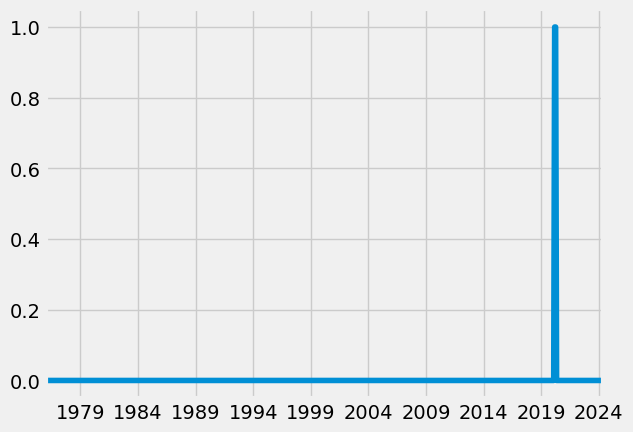

In [366]:
# Identifying any missing values and plotting a graph to visualise 
unemp_states.isna().sum(axis = 1).plot()

In [441]:
unemp_2020 = unemp_states.loc['2020']
unemp_2020.isna().sum(axis = 1)

2020-01-01    0
2020-02-01    0
2020-03-01    1
2020-04-01    1
2020-05-01    0
2020-06-01    0
2020-07-01    0
2020-08-01    0
2020-09-01    0
2020-10-01    0
2020-11-01    0
2020-12-01    0
Freq: MS, dtype: int64

In [452]:
# identifiying the rows where the missing data is 
missing_values_2020 = unemp_2020[unemp_2020.isna().any(axis=1)]
missing_values_2020

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
2020-03-01   5.5   5.0   4.2   4.1   4.9   4.8   3.7   3.4   3.0   4.0   5.1   
2020-04-01  16.1  12.8  15.6  13.4  16.1  16.5  22.6  13.8  17.4  14.2  18.1   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
2020-03-01   4.1   3.7   3.3   4.9   3.0   3.2   4.2   3.1   5.9   3.6   3.5   
2020-04-01  15.0  12.4  11.2  13.8  14.0  12.0  16.8  11.8   9.0   8.9  15.8   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
2020-03-01   5.2   3.4   3.7   5.4   7.3   4.9   3.2   3.5   5.5   2.6   2.5   
2020-04-01  16.7   9.0  13.7  15.8  30.6  10.1  12.5  11.6  11.7  11.0  10.0   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
2020-03-01   NaN   3.5   6.7   2.1   2.4   3.5   5.8   5.9   3.2   4.4   3.9   
2020-04-01   NaN  16.8  13.5  22.5   8.7  12.0  11.2  15.6   9.3   8.2   8.3   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  \
2020-03-01   2.7   2.6   3.7   3.1   4.8   5.0   2.4   2.4     3.9     4.2   
2020-04-01  11.8  16.0  17.9  12.1   5.1  13.1  14.1   8.8    15.4    13.0   

            CNERUR  CWSTUR  CNEWUR  
2020-03-01     4.2     5.0     3.3  
2020-04-01    15.1    15.4    14.2

In [462]:
# identifying where the columns with the missing data is 
columns_missing_data = missing_values_2020.columns[missing_values_2020.isna().any()]
missing_values_filtered = missing_values_2020[columns_missing_data]

In [464]:
missing_values_filtered

PRUR
2020-03-01   NaN
2020-04-01   NaN

In [486]:
# Searching what PRUR is

PRUR_search = unemp_df.loc[unemp_df['id'] == "PRUR"]
PRUR_search


id realtime_start realtime_end                             title  \
series id                                                                       
PRUR       PRUR     2024-07-11   2024-07-11  Unemployment Rate in Puerto Rico   

          observation_start observation_end frequency frequency_short  \
series id                                                               
PRUR             1976-01-01      2024-05-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
PRUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
PRUR       2024-06-26 12:20:13-05:00         20  None

In [488]:
# Puerto Rico is not a state in the US - therefore we will drop this from the data set 

unemp_states = unemp_states.drop('PRUR', axis = 1)

In [586]:
# Veryfying no null values
unemp_states.isna().sum(axis = 1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2024-01-01    0
2024-02-01    0
2024-03-01    0
2024-04-01    0
2024-05-01    0
Freq: MS, Length: 581, dtype: int64

In [605]:
# Changing the ID to actual State names 

title_unemp_df = unemp_df['title'].str.replace('unemployment rate in ', '', case = False).to_dict() # Replacing the title such that it displays only the State name and storing it as a dictionary
title_unemp_df

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'MNUR': 'Minnesota',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'UTUR': 'Utah',
 'PRUR': 'Puerto Rico',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'HIUR': 'Hawaii',
 'LASMT261982000000003': 'Detroit-Warren-Dearborn, MI (MSA)',
 'NDUR': 'North Dakota',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'MSUR': 'Mississippi',
 'MEUR': 'Maine',
 'NEUR': 'Nebraska',
 'L

In [990]:
unemp_states = unemp_states.rename(columns = {'the District of Columbia': 'District of Columbia'})
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Indiana',
       'Louisiana', 'Hawaii', 'North Dakota', 'Montana',
       'District of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota',
       'Midwest Census Region', 'South Census Region',
       'Northeast Census Region', 'West Census Region',
       'New England Census Division'],
      dtype='object')

In [992]:
# Dropping the last 5 columns as they are not states 
unemp_states_final = unemp_states.drop(unemp_states.columns[-5:], axis = 1)

In [994]:
unemp_states_final

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-01-01         5.2    3.9       4.5      3.1           3.4   3.7   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   
...              ...      ...            ...             ...       ...   
2024-01-01       4.0      2.9            3.0             3.5       4.7   
2024-02-01       3.9      3.0            2.9             3.5       4.8   
2024-03-01       3.9      3.0            2.9             3.5       4.8   
2024-04-01       3.9      3.1            2.9             3.5       4.8   
2024-05-01       3.9      3.0            3.0             3.6       4.9   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   
...                ...      ...       ...      ...        ...       ...   
2024-01-01         4.8      3.1       3.4      4.2        3.2       3.0   
2024-02-01         4.8      3.1       3.5      4.1        3.0       3.0   
2024-03-01         4.8      3.1       3.7      3.8        3.0       2.9   
2024-04-01         4.7      3.1       3.7      3.6        2.9       2.8   
2024-05-01         4.6      3.2       3.8      3.4        2.9       2.7   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   
...              ...             ...         ...        ...        ...   
2024-01-01       4.3             3.0         4.0        2.7        3.5   
2024-02-01       4.4             3.1         3.9        2.7        3.3   
2024-03-01       4.5             3.1         3.8        2.7        3.2   
2024-04-01       4.6             3.2         3.8        2.7        3.1   
2024-05-01       4.6             3.4         3.8        2.8        3.0   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   
...   

# Graphical Analysis 

C:\Users\Al-Amin\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



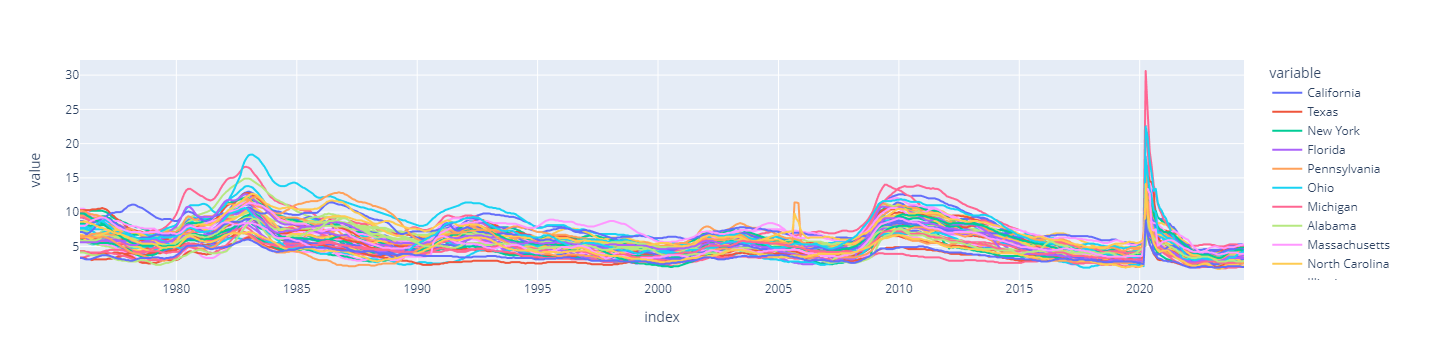

In [996]:
# Plotting State's Unemployment Rate 
px.line(unemp_states_final)

In [998]:
# Pulling April 2020 Unemployment Rate per State 
unemp_states_2020 = unemp_states_final.loc[unemp_states_final.index == '2020-04-01'].T.sort_values('2020-04-01') 
# Locating what the unemployment rate of each state is for the selected date, .T tranforms the data such that the columns are now rows 

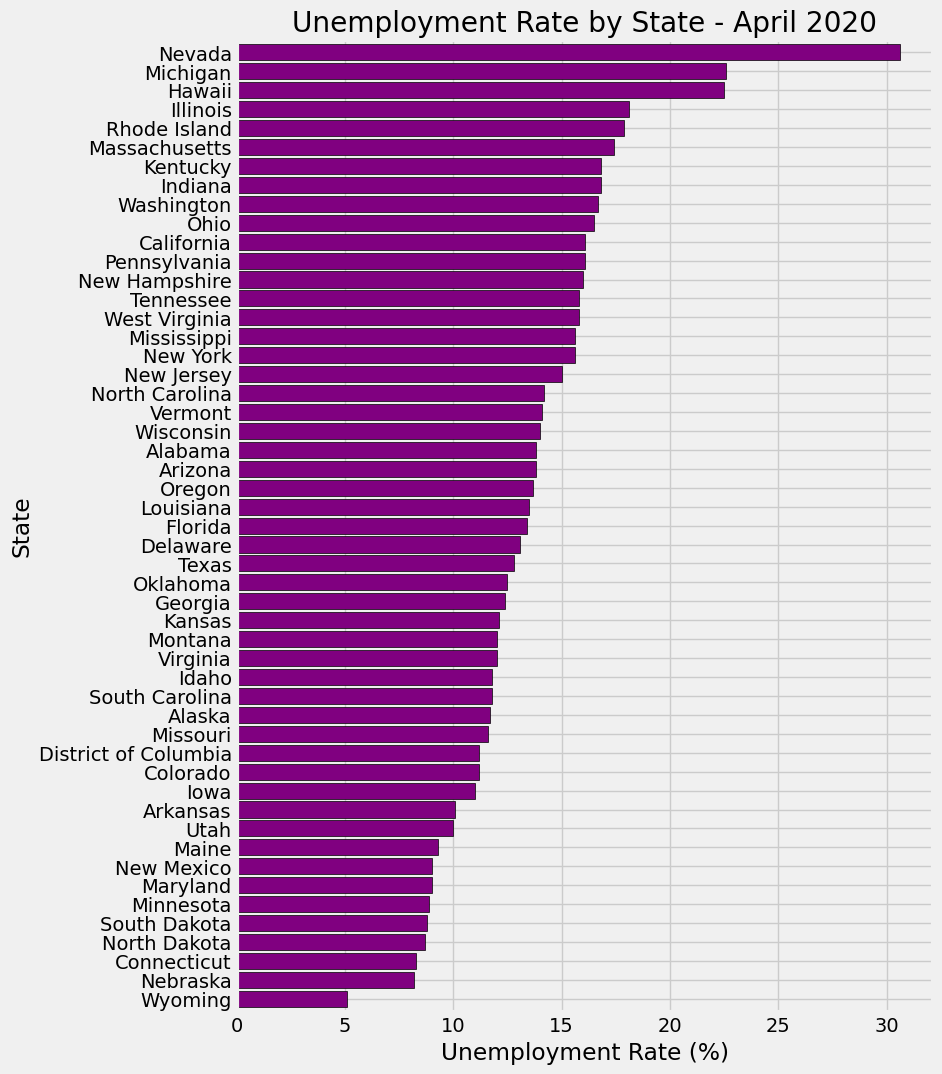

In [1000]:
URS_2020 = unemp_states_2020.plot(kind = 'barh', figsize = (8,12), width = 0.85, 
                                  edgecolor = 'black', color = 'purple', 
                                  title = 'Unemployment Rate by State - April 2020', 
                                  xlabel = 'Unemployment Rate (%)', ylabel = 'State')    
URS_2020.legend().remove()
plt.show()

# Participation Rate 

In [761]:
# Looking at the participation rate - Indicator of people participating in the job market 

In [1002]:
# Pulling the participation rate from FRED API 

part_df = fred.search('participation rate state', filter = ('frequency', 'Monthly'))
part_df = part_df.query(' seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ')
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for' or 'Labor Force Participation Rate in', case = False)]

In [1004]:
part_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-07-11   2024-07-11   
LBSSA01    LBSSA01     2024-07-11   2024-07-11   
LBSSA36    LBSSA36     2024-07-11   2024-07-11   
LBSSA26    LBSSA26     2024-07-11   2024-07-11   
LBSSA28    LBSSA28     2024-07-11   2024-07-11   
LBSSA48    LBSSA48     2024-07-11   2024-07-11   
LBSSA12    LBSSA12     2024-07-11   2024-07-11   
LBSSA21    LBSSA21     2024-07-11   2024-07-11   
LBSSA39    LBSSA39     2024-07-11   2024-07-11   
LBSSA55    LBSSA55     2024-07-11   2024-07-11   
LBSSA42    LBSSA42     2024-07-11   2024-07-11   
LBSSA25    LBSSA25     2024-07-11   2024-07-11   
LBSSA27    LBSSA27     2024-07-11   2024-07-11   
LBSSA24    LBSSA24     2024-07-11   2024-07-11   
LBSSA54    LBSSA54     2024-07-11   2024-07-11   
LBSSA47    LBSSA47     2024-07-11   2024-07-11   
LBSSA23    LBSSA23     2024-07-11   2024-07-11   
LBSSA17    LBSSA17     2024-07-11   2024-07-11   
LBSSA37    LBSSA37     2024-07-11   2024-07-11   
LBSSA13    LBSSA13     2024-07-11   2024-07-11   
LBSSA22    LBSSA22     2024-07-11   2024-07-11   
LBSSA45    LBSSA45     2024-07-11   2024-07-11   
LBSSA08    LBSSA08     2024-07-11   2024-07-11   
LBSSA49    LBSSA49     2024-07-11   2024-07-11   
LBSSA51    LBSSA51     2024-07-11   2024-07-11   
LBSSA18    LBSSA18     2024-07-11   2024-07-11   
LBSSA29    LBSSA29     2024-07-11   2024-07-11   
LBSSA34    LBSSA34     2024-07-11   2024-07-11   
LBSSA19    LBSSA19     2024-07-11   2024-07-11   
LBSSA02    LBSSA02     2024-07-11   2024-07-11   
LBSSA53    LBSSA53     2024-07-11   2024-07-11   
LBSSA04    LBSSA04     2024-07-11   2024-07-11   
LBSSA35    LBSSA35     2024-07-11   2024-07-11   
LBSSA16    LBSSA16     2024-07-11   2024-07-11   
LBSSA05    LBSSA05     2024-07-11   2024-07-11   
LBSSA40    LBSSA40     2024-07-11   2024-07-11   
LBSSA31    LBSSA31     2024-07-11   2024-07-11   
LBSSA15    LBSSA15     2024-07-11   2024-07-11   
LBSSA32    LBSSA32     2024-07-11   2024-07-11   
LBSSA30    LBSSA30     2024-07-11   2024-07-11   
LBSSA41    LBSSA41     2024-07-11   2024-07-11   
LBSSA33    LBSSA33     2024-07-11   2024-07-11   
LBSSA50    LBSSA50     2024-07-11   2024-07-11   
LBSSA09    LBSSA09     2024-07-11   2024-07-11   
LBSSA38    LBSSA38     2024-07-11   2024-07-11   
LBSSA46    LBSSA46     2024-07-11   2024-07-11   
LBSSA20    LBSSA20     2024-07-11   2024-07-11   
LBSSA44    LBSSA44     2024-07-11   2024-07-11   
LBSSA11    LBSSA11     2024-07-11   2024-07-11   
LBSSA10    LBSSA10     2024-07-11   2024-07-11   
LBSSA56    LBSSA56     2024-07-11   2024-07-11   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [1010]:
title_part_df = part_df['title'].str.replace('Labor Force Participation Rate for ', '', case = False).to_dict()
all_results = [] 
for myid in part_df.index:
        results = fred.get_series(myid) 
        results = results.to_frame(name = myid) 
        all_results.append(results) 
part_states = pd.concat(all_results, axis = 1) 
part_states.columns = [title_part_df [c] for c in part_states.columns]

In [1011]:
part_states.isna().sum(axis = 1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2024-01-01    0
2024-02-01    0
2024-03-01    0
2024-04-01    0
2024-05-01    0
Length: 581, dtype: int64

C:\Users\Al-Amin\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



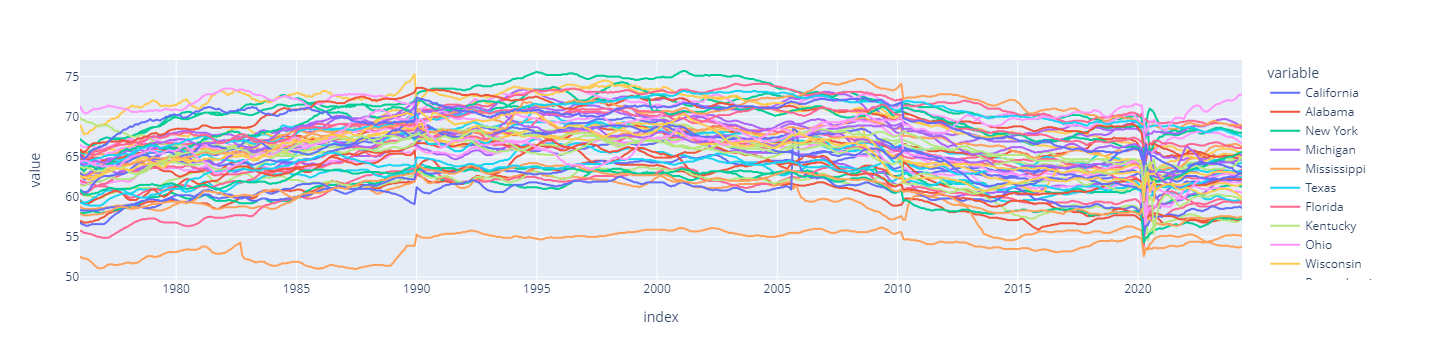

In [1012]:
# Plotting State's Unemployment Rate 
px.line(part_states)

# Unemployment vs Participation 

In [1014]:
# Plotting the unemployment rate and Participation rate for each state over the years 2020 and 2021 

<Axes: >

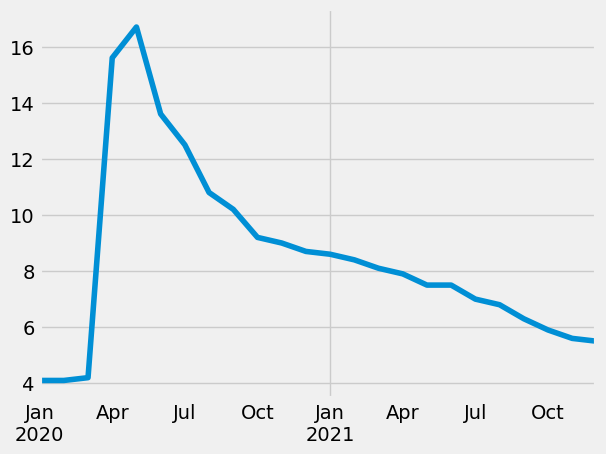

In [1015]:
unemp_states_final.query('index >= 2020 and index <2022')['New York'].plot()

Text(0.5, 1.0, 'New York')

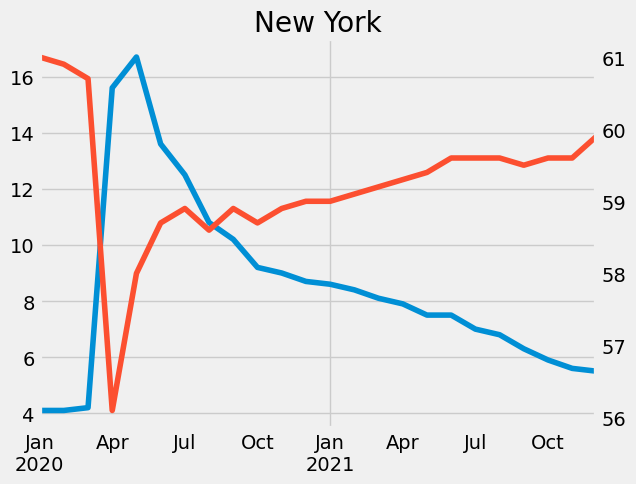

In [1016]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states_final.query('index >= 2020 and index <2022')['New York'].plot(ax=ax, label = 'Unemployment')
part_states.query('index >= 2020 and index <2022')['New York'].plot(ax=ax2, label = 'Participation', color = color_pal[1])
ax2.grid(False)
ax.set_title('New York')

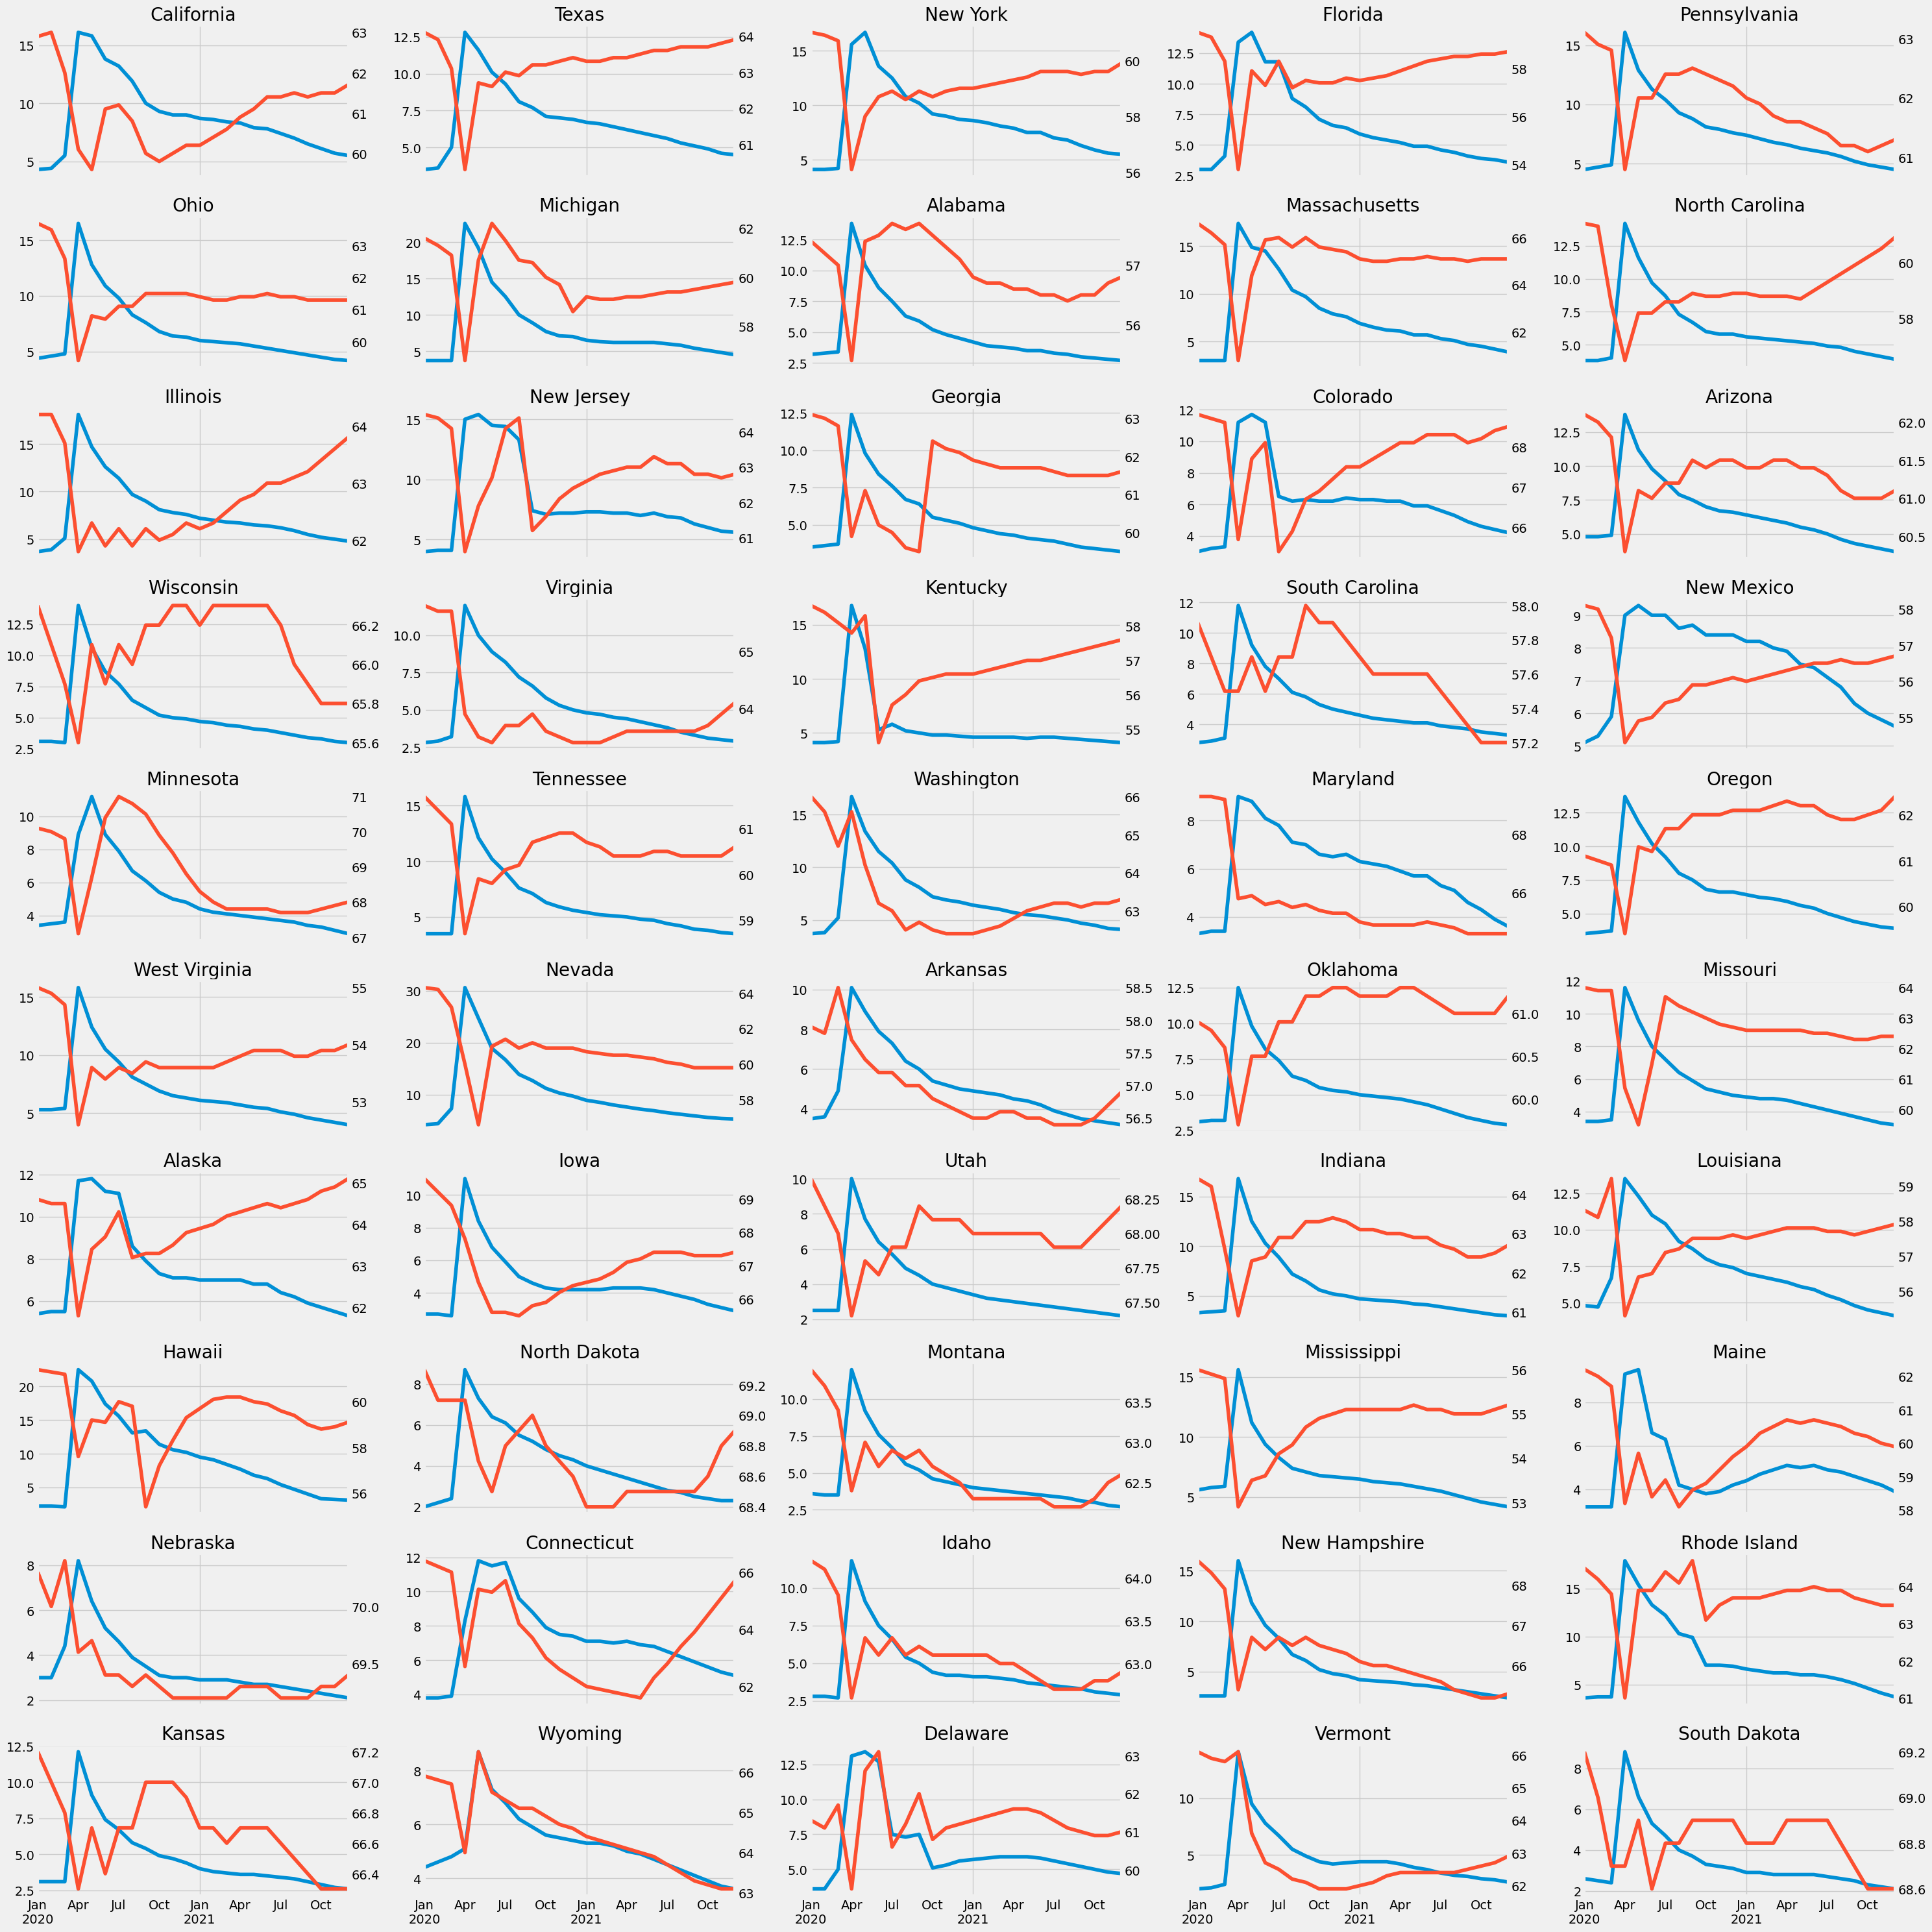

In [1047]:
fig, axs = plt.subplots( 10, 5, figsize = (30,30), sharex = True)
axs = axs.flatten()

i=0
for state in unemp_states_final.columns:
    if state == 'District of Columbia':
        continue
    ax2 = axs[i].twinx()
    unemp_states_final.query('index >= 2020 and index <2022')[state].plot(ax=axs[i], label = 'Unemployment')
    part_states.query('index >= 2020 and index <2022')[state].plot(ax=ax2, label = 'Participation', color = color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i +=1
plt.tight_layout()    
plt.show()    